# Task 3 - Insurance Claims - Fraud Detection
## Author: Josiah Randleman
## Date: 9/27/2023

### Which Age Demographic Has The Highest Fraud Rate???

---

## Section 1-Load - Read from a data file into a pandas DataFrame

In [28]:
import pandas as pd
import chardet

with open('fraud_insurance_claims.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
insurance = pd.read_csv('fraud_insurance_claims.csv', encoding=result['encoding'])

insurance

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16 00:00:00,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05 00:00:00,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17 00:00:00,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18 00:00:00,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


---

## Section 2-View - Display the first 5 rows and the last 5 rows

In [29]:
import pandas as pd

insurance = pd.read_csv('fraud_insurance_claims.csv', index_col=0)

pd.set_option('display.precision', 2)

# Display the first 5 rows
first_5_rows = insurance.head(5)

# Display the last 5 rows
last_5_rows = insurance.tail(5)

# Combine the two dataframes vertically
result = pd.concat([first_5_rows, last_5_rows])

print(result)

                    age  policy_number     policy_bind_date policy_state  \
months_as_customer                                                         
328                  48         521585  2014-10-17 00:00:00           OH   
228                  42         342868  2006-06-27 00:00:00           IN   
134                  29         687698  2000-09-06 00:00:00           OH   
256                  41         227811  1990-05-25 00:00:00           IL   
228                  44         367455  2014-06-06 00:00:00           IL   
3                    38         941851  1991-07-16 00:00:00           OH   
285                  41         186934  2014-01-05 00:00:00           IL   
130                  34         918516  2003-02-17 00:00:00           OH   
458                  62         533940  2011-11-18 00:00:00           IL   
456                  60         556080  1996-11-11 00:00:00           OH   

                   policy_csl  policy_deductable  policy_annual_premium  \
months_as_cu

---

## Section 3-Describe: Use the DataFrame describe() function to calculate basic descriptive statistics for all numeric columns

In [30]:
import pandas as pd

insurance = pd.read_csv('fraud_insurance_claims.csv', index_col=0)

pd.set_option('display.precision', 2)

insurance.describe()

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.00,1000.00,1000.00,1000.00,1.00e+03,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,38.95,546238.65,1136.00,1256.41,1.10e+06,501214.49,25126.10,-26793.7,11.64,1.84,0.99,1.49,52761.94,7433.42,7399.57,37928.95,2005.10
std,9.14,257063.01,611.86,244.17,2.30e+06,71701.61,27872.19,28104.1,6.95,1.02,0.82,1.11,26401.53,4880.95,4824.73,18886.25,6.02
min,19.00,100804.00,500.00,433.33,-1.00e+06,430104.00,0.00,-111100.0,0.00,1.00,0.00,0.00,100.00,0.00,0.00,70.00,1995.00
25%,32.00,335980.25,500.00,1089.61,0.00e+00,448404.50,0.00,-51500.0,6.00,1.00,0.00,1.00,41812.50,4295.00,4445.00,30292.50,2000.00
50%,38.00,533135.00,1000.00,1257.20,0.00e+00,466445.50,0.00,-23250.0,12.00,1.00,1.00,1.00,58055.00,6775.00,6750.00,42100.00,2005.00
75%,44.00,759099.75,2000.00,1415.70,0.00e+00,603251.00,51025.00,0.0,17.00,3.00,2.00,2.00,70592.50,11305.00,10885.00,50822.50,2010.00
max,64.00,999435.00,2000.00,2047.59,1.00e+07,620962.00,100500.00,0.0,23.00,4.00,2.00,3.00,114920.00,21450.00,23670.00,79560.00,2015.00


---

## Section 4-Series: Use the Series method describe() to calculate the descriptive stats for all category/text columns

In [31]:
import pandas as pd

insurance = pd.read_csv('fraud_insurance_claims.csv', index_col=0)

pd.set_option('display.precision', 2)

insurance.describe(include='object')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,909,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,4,7,7,1000,3,3,14,39,2
top,2006-01-01 00:00:00,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2015-02-02 00:00:00,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


---

## Section 5-Unique: Use the Series method unique() to get unique category values

In [32]:
import pandas as pd

# Read the 'fraud_insurance_claims.csv' file into a DataFrame
insurance = pd.read_csv('fraud_insurance_claims.csv', index_col=0)

# Set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

# List of columns for which you want to find unique values
columns_of_interest = [
    'policy_state', 'policy_csl', 'insured_sex',
    'insured_education_level', 'insured_occupation', 'insured_hobbies',
    'insured_relationship', 'incident_type', 'incident_severity',
    'authorities_contacted', 'incident_state', 'incident_city',
    'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'
]

# Loop through each column and find unique values
for col in columns_of_interest:
    unique_values = insurance[col].unique()
    print(f"Unique values for {col}: {unique_values}")

Unique values for policy_state: ['OH' 'IN' 'IL']
Unique values for policy_csl: ['250/500' '100/300' '500/1000']
Unique values for insured_sex: ['MALE' 'FEMALE']
Unique values for insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Unique values for insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
Unique values for insured_hobbies: ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
Unique values for insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
Unique values for incident_type: ['Single Vehicle Collision' 'Vehicle Theft' '

---

## Section 6-Histograms: Use the DataFrame's hist() function to create a histogram for each numerical column

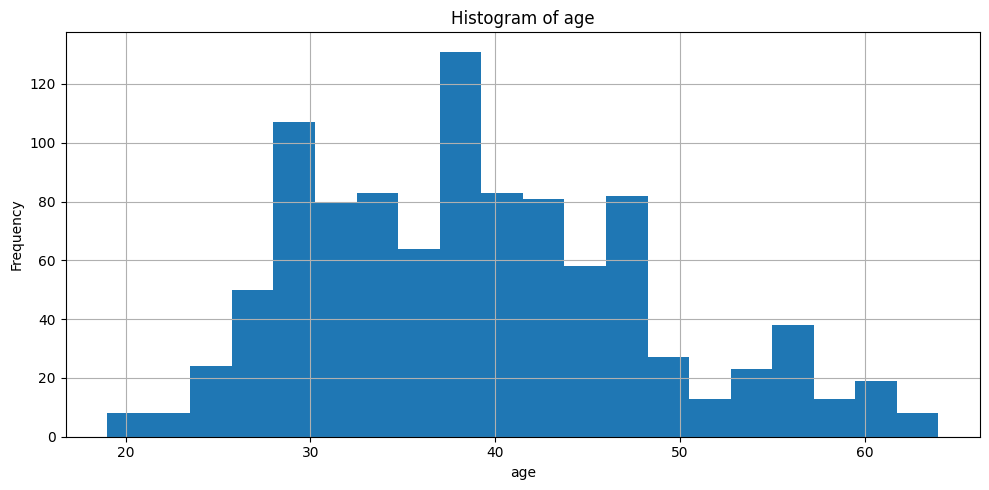

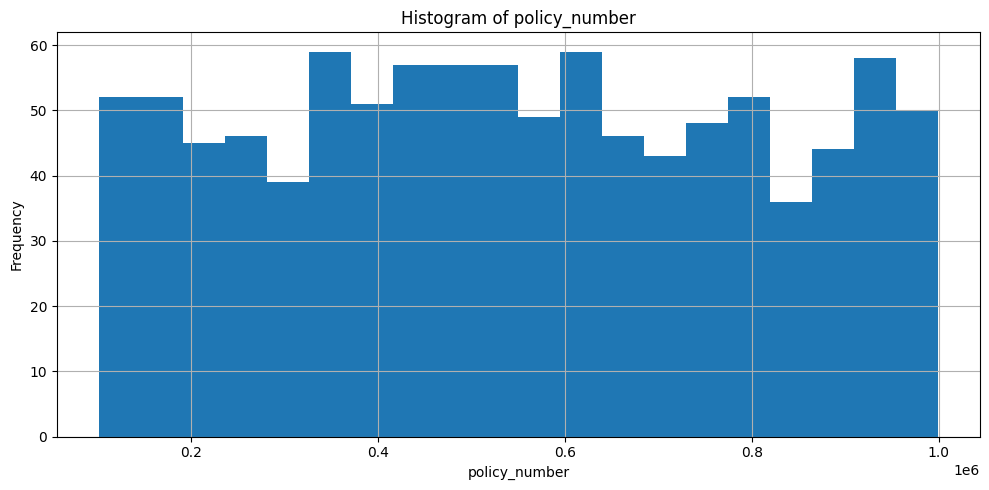

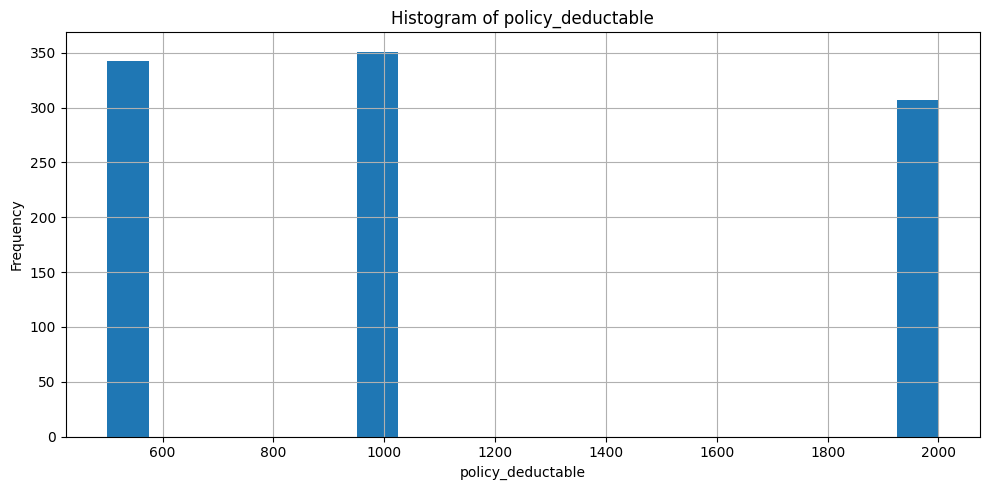

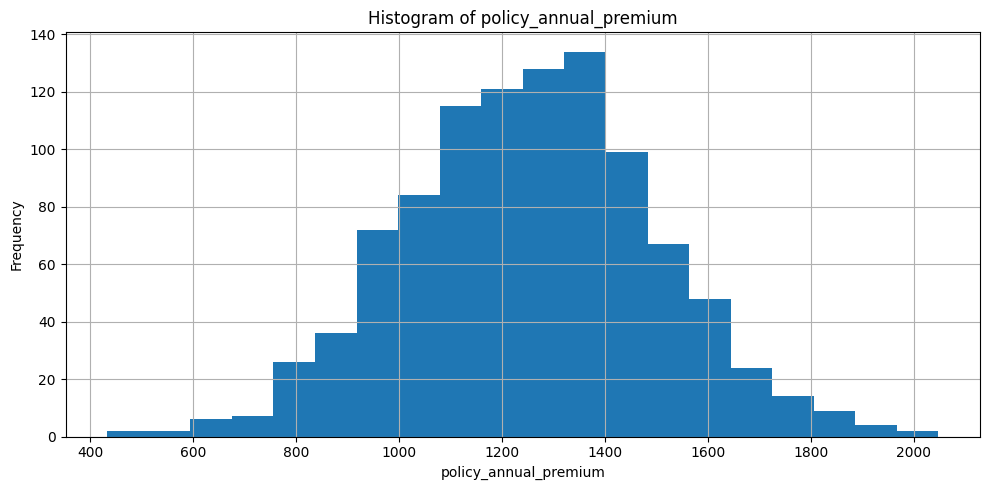

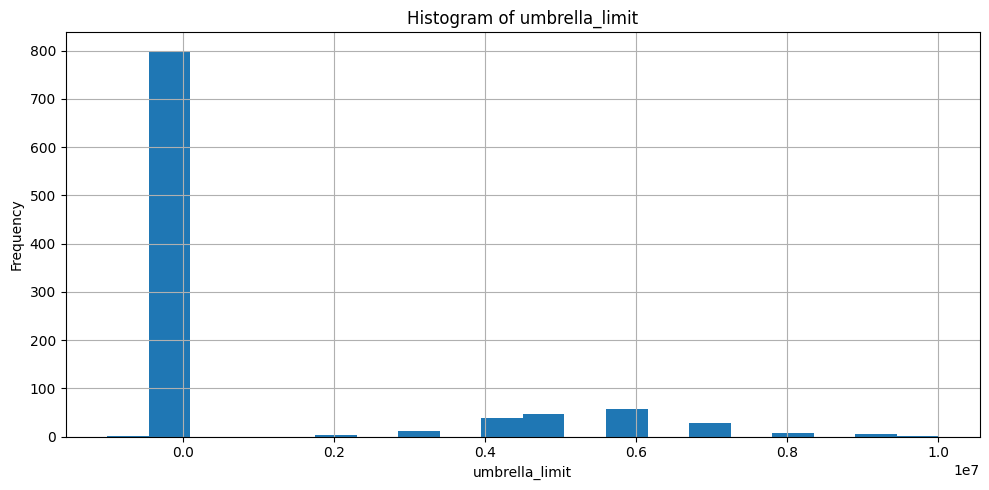

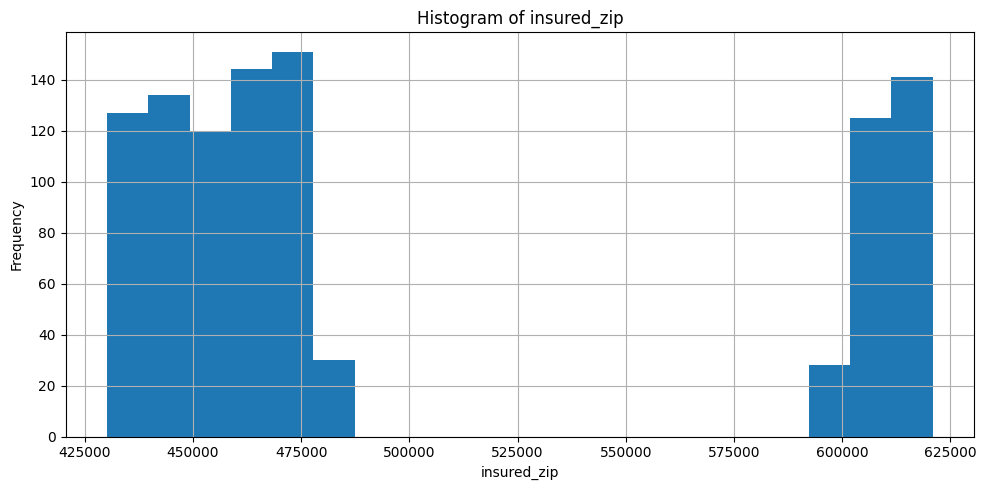

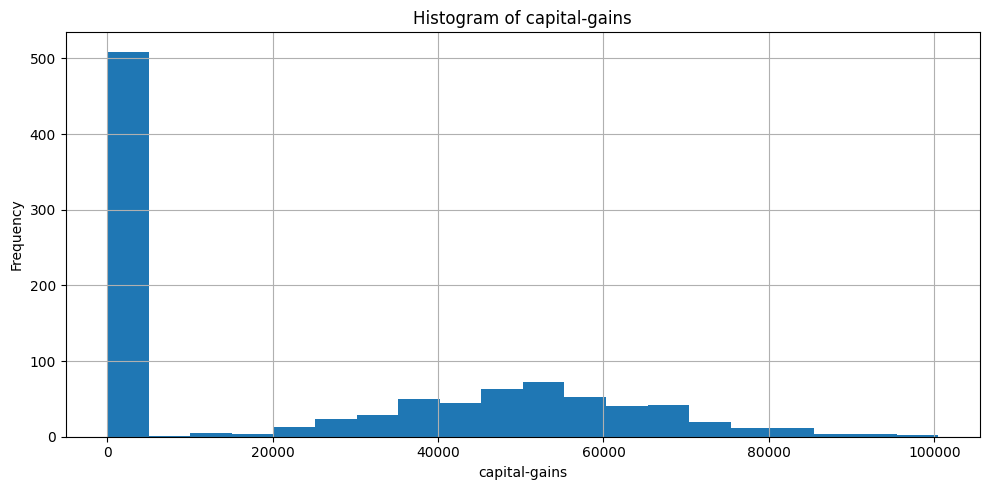

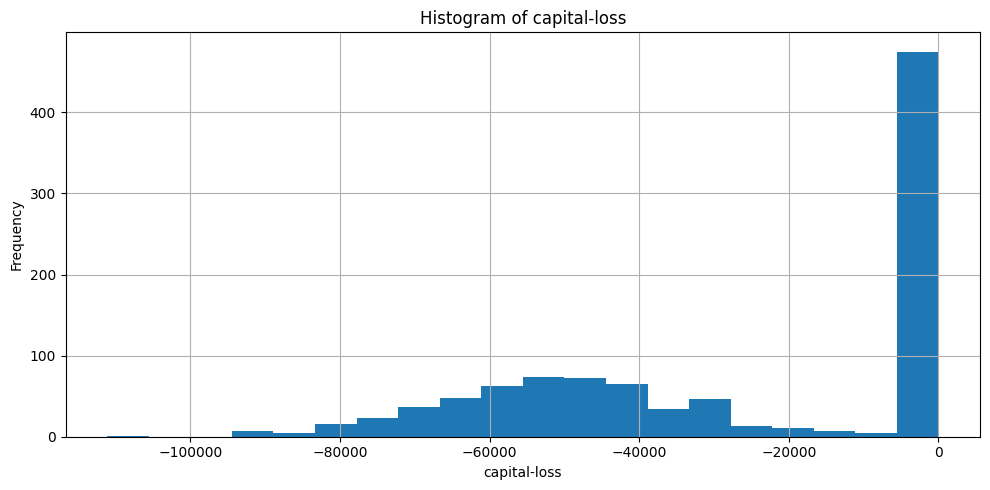

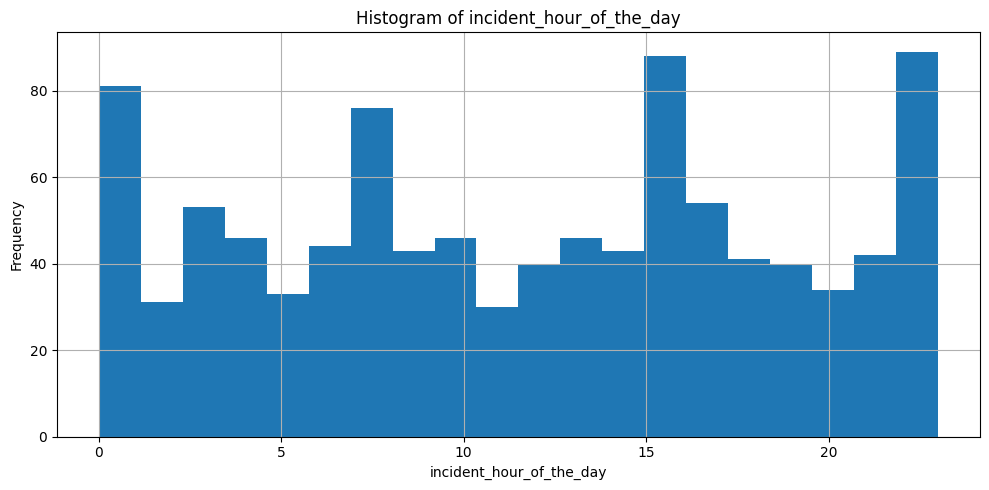

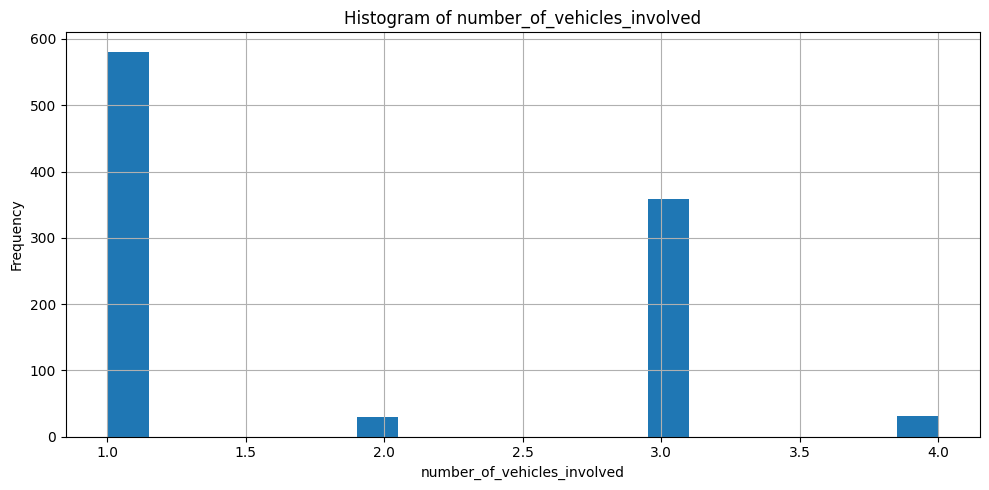

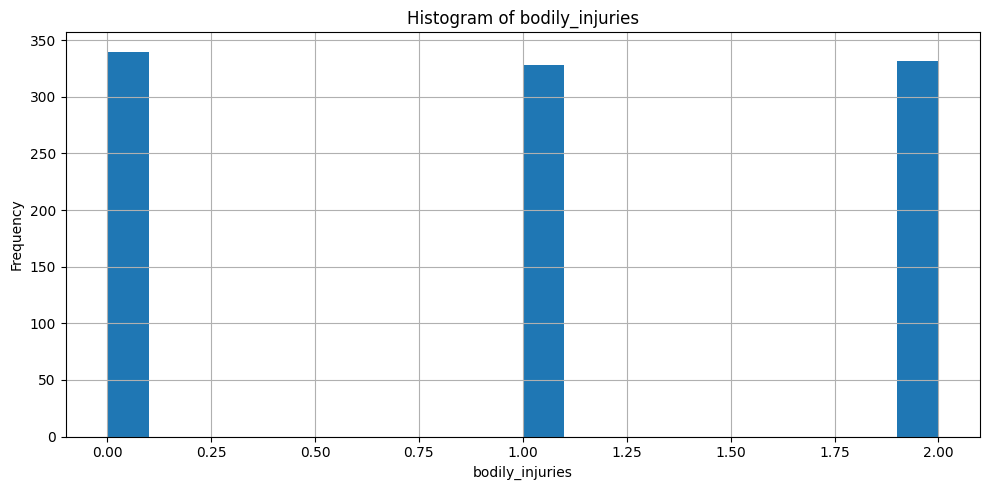

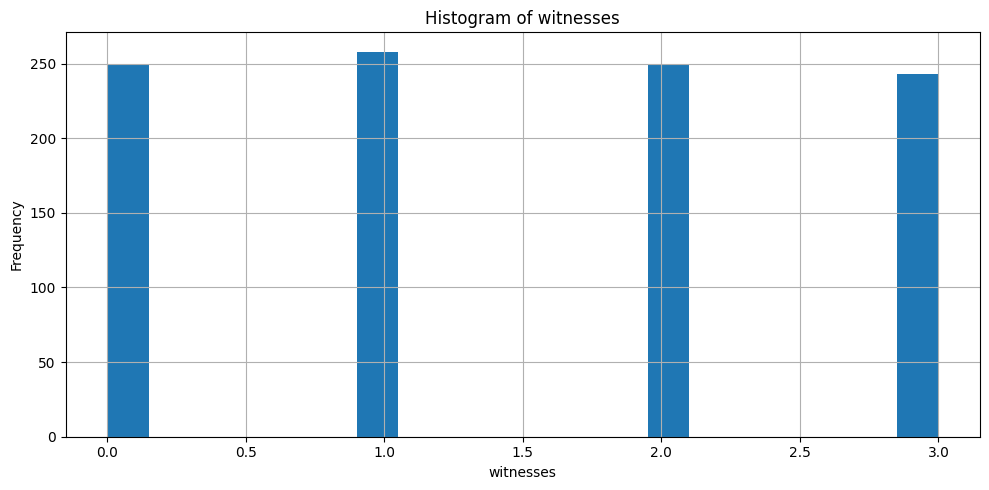

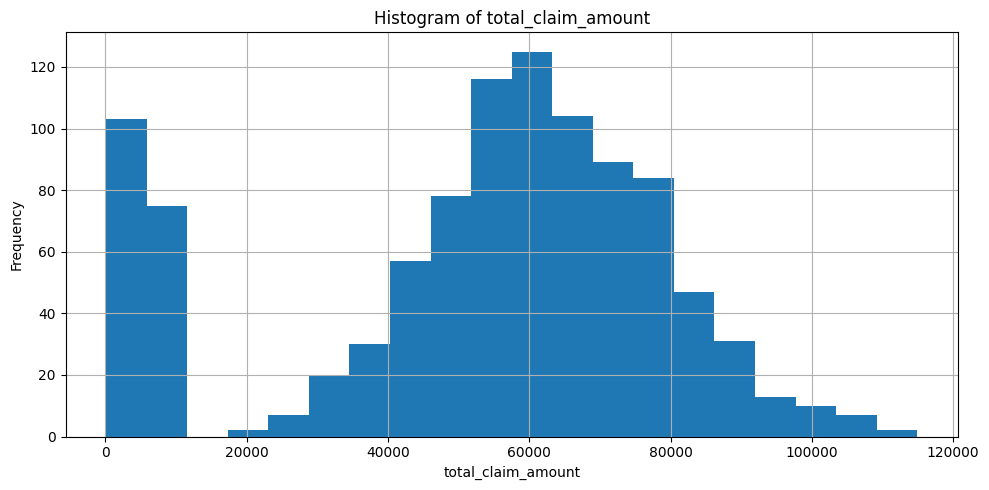

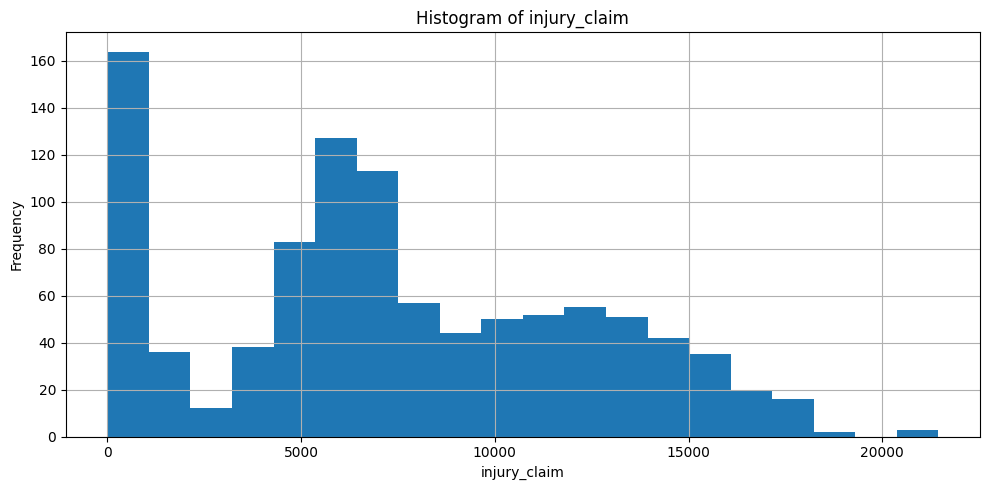

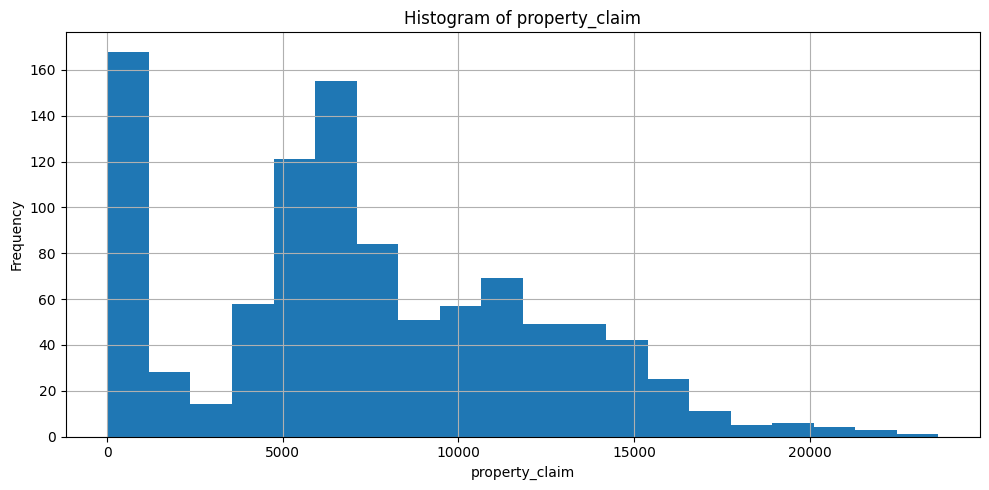

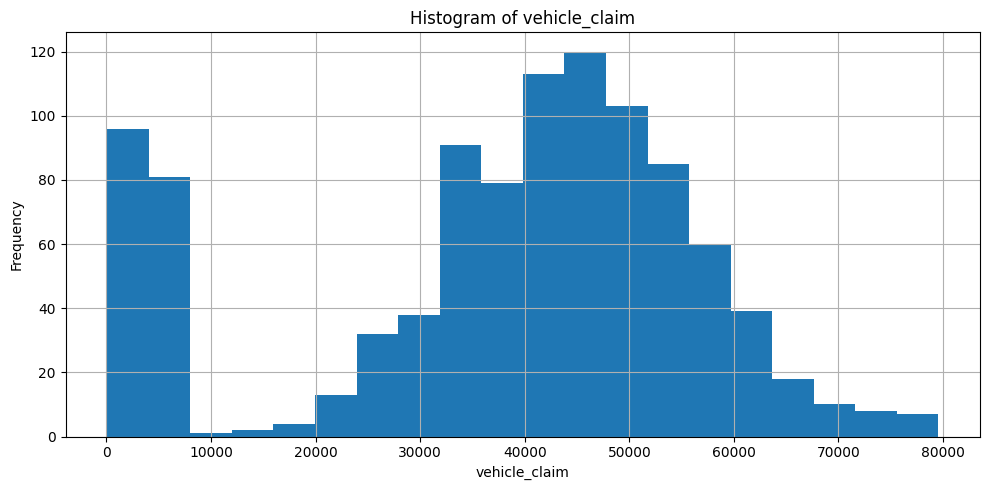

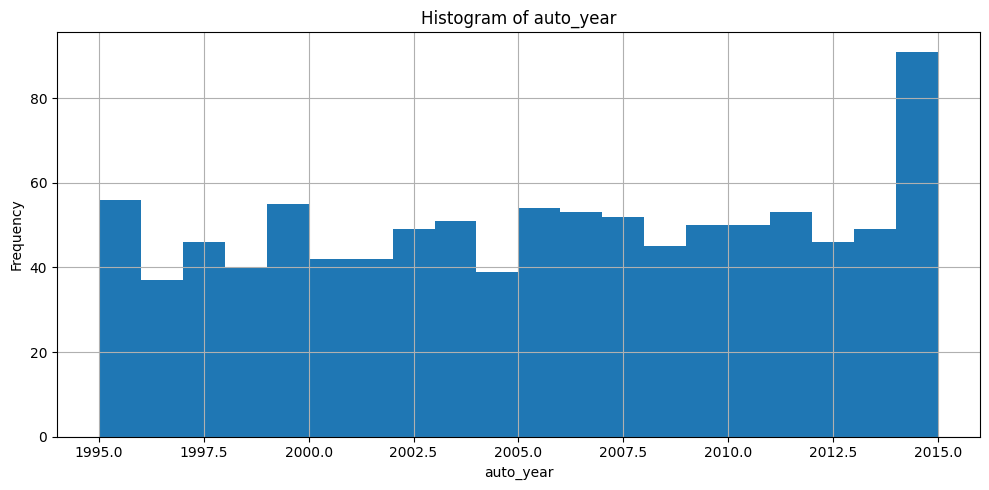

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detect the encoding of the CSV file
with open('fraud_insurance_claims.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the 'fraud_insurance_claims.csv' file into a DataFrame using the detected encoding
insurance = pd.read_csv('fraud_insurance_claims.csv', encoding=result['encoding'])

# Set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

# List of columns for which you want to plot histograms
columns_of_interest = [
    'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 
    'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'
]

# Loop through each column and plot individual histograms
for col in columns_of_interest:
    plt.figure(figsize=(10, 5))  # Set the figure size for each plot
    insurance[col].hist(bins=20)  # Adjust the number of bins if needed
    plt.title(f'Histogram of {col}')  # Set the title
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.tight_layout()
    plt.show()


---

## Section 7-List: Get some of your information into a list. Process each item in the list (use for or comprehensions as you like)

In [34]:
import pandas as pd
import chardet

# Detect the encoding of the CSV file
with open('fraud_insurance_claims.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the 'fraud_insurance_claims.csv' file into a DataFrame using the detected encoding
insurance = pd.read_csv('fraud_insurance_claims.csv', encoding=result['encoding'])

# Set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

# List of columns to find the mean
columns_of_interest = [
    'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 
    'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
    'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'
]

# Use list comprehension to calculate the mean of each column
mean_values = {col: insurance[col].mean() for col in columns_of_interest}

# Display the mean values
print(mean_values)


{'age': 38.948, 'policy_number': 546238.648, 'policy_deductable': 1136.0, 'policy_annual_premium': 1256.4061499999998, 'umbrella_limit': 1101000.0, 'insured_zip': 501214.488, 'capital-gains': 25126.1, 'capital-loss': -26793.7, 'incident_hour_of_the_day': 11.644, 'number_of_vehicles_involved': 1.839, 'bodily_injuries': 0.992, 'witnesses': 1.487, 'total_claim_amount': 52761.94, 'injury_claim': 7433.42, 'property_claim': 7399.57, 'vehicle_claim': 37928.95, 'auto_year': 2005.103}


---

## Section 8-Filter: Use filter() to show only part of the information

In [35]:
import pandas as pd
import chardet

# Detect the encoding of the CSV file
with open('fraud_insurance_claims.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the 'fraud_insurance_claims.csv' file into a DataFrame using the detected encoding
insurance = pd.read_csv('fraud_insurance_claims.csv', encoding=result['encoding'])

# Set the display precision to 2 decimal places
pd.set_option('display.precision', 2)

# Define a function to filter rows where 'fraud_reported' is 'Y'
def filter_fraud(row):
    return row.fraud_reported == 'Y'

# Use filter() to filter rows, then convert the result back to a DataFrame
filtered_insurance = pd.DataFrame(filter(filter_fraud, insurance.itertuples(index=True, name='Pandas')))

# Drop the index column
filtered_insurance = filtered_insurance.iloc[:, 1:]

# Set the columns to be the same as the original DataFrame
filtered_insurance.columns = insurance.columns

# Display the filtered DataFrame
print(filtered_insurance)


     months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                   328   48         521585  2014-10-17 00:00:00           OH   
1                   228   42         342868  2006-06-27 00:00:00           IN   
2                   256   41         227811  1990-05-25 00:00:00           IL   
3                   256   39         104594  2006-10-12 00:00:00           OH   
4                   180   38         644081  1998-12-28 00:00:00           OH   
..                  ...  ...            ...                  ...          ...   
242                 234   41         291006  1990-05-16 00:00:00           IN   
243                 266   42         929306  2003-03-06 00:00:00           IN   
244                 230   43         490514  2007-02-09 00:00:00           IN   
245                 232   42         182953  2013-04-30 00:00:00           IN   
246                 235   39         836349  2013-05-01 00:00:00           IL   

    policy_csl  policy_dedu

---

## Section 9-Map: Use map() to transform some of the data.

In [36]:
import pandas as pd
import chardet

# Detect the encoding of the CSV file
with open('fraud_insurance_claims.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the CSV file into a DataFrame
insurance = pd.read_csv('fraud_insurance_claims.csv', encoding=result['encoding'])

# Define a function to categorize age
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Old'

# Use map() to apply the function to the 'age' column
insurance['age_category'] = insurance['age'].map(categorize_age)

# Display the DataFrame to verify the transformation
print(insurance[['age', 'age_category', 'fraud_reported']].head(20))


    age age_category fraud_reported
0    48  Middle-aged              Y
1    42  Middle-aged              Y
2    29        Young              N
3    41  Middle-aged              Y
4    44  Middle-aged              N
5    39  Middle-aged              Y
6    34  Middle-aged              N
7    37  Middle-aged              N
8    33  Middle-aged              N
9    42  Middle-aged              N
10   42  Middle-aged              N
11   61          Old              N
12   23        Young              N
13   34  Middle-aged              N
14   38  Middle-aged              Y
15   58  Middle-aged              Y
16   26        Young              N
17   31  Middle-aged              N
18   37  Middle-aged              N
19   39  Middle-aged              N


---

## Section 10 - Which Demographic Commited The Most Fraud???

In [37]:
import pandas as pd
import chardet

# Detect the encoding of the CSV file
with open('fraud_insurance_claims.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the CSV file into a DataFrame
insurance = pd.read_csv('fraud_insurance_claims.csv', encoding=result['encoding'])

# Define a function to categorize age
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Old'

# Use map() to apply the function to the 'age' column
insurance['age_category'] = insurance['age'].map(categorize_age)

# Group by 'age_category' and 'fraud_reported' and then count the occurrences
age_fraud_count = insurance.groupby(['age_category', 'fraud_reported']).size().reset_index(name='count')

print(age_fraud_count)


  age_category fraud_reported  count
0  Middle-aged              N    620
1  Middle-aged              Y    198
2          Old              N     18
3          Old              Y      9
4        Young              N    115
5        Young              Y     40


### Based on the analysis, it is evident that fraudulent claims are most prevalent among the middle-aged demographic, which leads with a substantial total of 198 cases. 

---